# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Shandi Adhitya Suwondo
- **Email:** shandiadhitya2814@gmail.com
- **ID Dicoding:** shandi_adhitya_suwondo_aos1

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dalam setahun, tahun berapakah yang lebih unggul?
- Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?
- Bagaimana pola penggunaan sepeda berbeda antara working days, holidays, dan weekdays, dan bagaimana ini mempengaruhi kebutuhan infrastruktur sepeda?
- Bagaimana pengaruh musim terhadap jumlah penyewa sepeda?
- Bagaimana pengaruh suhu udara dan kelembaban udara terhadap jumlah penyewa sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



## Data Wrangling

### Gathering Data

Pada tahap ini peneliti akan menggunakan dataset yang sudah tersimpan di dalam folder data. Saya memilih **Bike Sharing Dataset**, maka peneliti akan memuat file **day.csv** saja dikarenakan **hour.csv** tidak relevan dengan pertanyaan bisnis yang telah ddi tetapkan.



##### Load Table day



In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

##### Menilai day_df

##### 1. Cek tipe data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat dilihat bahwa terdapat 1 kolom dengan tipe data yang tidak sesuai, yaitu **dteday**. Maka dari itu, peneliti harus memperbaiki tipe data **dteday** dari object menjadi datetime





##### 2. Cek missing values

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat bahwa pada day_df tidak ada mising values.

In [5]:
print(f"Jumlah duplikasi data:", day_df.duplicated().sum())



Jumlah duplikasi data: 0


Dapat dilihat bahwa pada day_df tidak ada duplikasi data.



##### 3. Cek duplikasi data

In [6]:
print(f"Jumlah duplikasi data:", day_df.duplicated().sum())



Jumlah duplikasi data: 0


Dapat dilihat bahwa pada day_df tidak ada duplikasi data.



##### 4. Cek anomali data

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat dilihat tidak ada anomali pada nilai statistik data.

### Cleaning Data

#### 1. Menghapus kolom yang tidak digunakan

Berdasarkan pertanyaan bisnis yang ada, maka kolom yang akan dihapus adalah **instant** dikarenakan indeks catatan ini tidak memberikan informasi yang dapat digunakan dan **windspeed** karena tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa. 

In [8]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
    if i in drop_col:
        day_df.drop(i, axis=1, inplace=True)
day_df.head()



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


##### 2. Mengubah tipe data kolom


In [9]:
#Mengubah tipe data ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

#Mengubah tipe data ke categorical
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

day_df.head()



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


##### 3. Mengubah angka menjadi keterangan

In [10]:
day_df['mnth'] = day_df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['yr'] = day_df['yr'].map({0: '2011', 1: '2012'})
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Snow'})
day_df.head()



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,Saturday,0,Mist,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,0,Mist,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## Exploratory Data Analysis (EDA)

### Explore Data day_df

#### 1. Mengelompokkan penyewa sepeda berdasarkan bulan

In [12]:
day_df.groupby('mnth').agg({
  'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(('cnt', 'mean'), ascending=False)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\3249455061.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('mnth').agg({


cnt                           
       max   min         mean     sum
mnth                                 
Jun   8120  3767  5772.366667  346342
Sep   8714  1842  5766.516667  345991
Aug   7865  1115  5664.419355  351194
Jul   8173  3285  5563.677419  344948
May   8294  2633  5349.774194  331686
Oct   8156    22  5199.225806  322352
Apr   7460   795  4484.900000  269094
Nov   6852  1495  4247.183333  254831
Mar   8362   605  3692.258065  228920
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933

Berdasarkan hasil diatas, dapat diketahui rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

#### 2. Mengelompokkean penyewa sepeda berdasarkan keadaan cuaca

In [13]:
day_df.groupby('weathersit').agg({
  'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(('cnt', 'mean'), ascending=False)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\3280164806.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weathersit').agg({


cnt                           
             max  min         mean      sum
weathersit                                 
Clear       8714  431  4876.786177  2257952
Mist        8362  605  4035.862348   996858
Light Snow  4639   22  1803.285714    37869

Berdasarkan hasil diatas, dapat diketahui rata-rata terbesar dan jumlah terbanyak adalah keadaan cuaca Clear. Sedangkan sangat sedikit ketika salju turun dan tidak ada penyewa saat cuaca sedang buruk.


#### 3. Mengelompokkan penyewa sepeda berdasarkan holiday

In [14]:
day_df.groupby('holiday').agg({
  'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(('cnt', 'mean'), ascending=False)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\3231389101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('holiday').agg({


cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

#### 4. Bandingkan penyewa saat weekday dan weekend







In [15]:
day_df.groupby('weekday').agg({
  'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(('cnt', 'mean'), ascending=False)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\2483215406.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weekday').agg({


cnt                           
            max   min         mean     sum
weekday                                   
Friday     8362  1167  4690.288462  487790
Thursday   7804   431  4667.259615  485395
Saturday   8714   627  4550.542857  477807
Wednesday  8173   441  4548.538462  473048
Tuesday    7767   683  4510.663462  469109
Monday     7525    22  4338.123810  455503
Sunday     8227   605  4228.828571  444027

Berdasarkan hasil diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

#### 5. Mengelompokkan penyewa sepeda berdasarkan workingday

In [16]:
day_df.groupby('workingday').agg({
  'cnt': ['max', 'min', 'mean',]
}).sort_values(('cnt', 'mean'), ascending=False)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\2522826764.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('workingday').agg({


cnt                  
             max  min         mean
workingday                        
1           8362   22  4584.820000
0           8714  605  4330.168831

Berdasarkan hasil diatas, jumlah penyewaan sepeda terbesar jatuh kepada workingday atau hari kerja dibandingkan dengan hari non-workingday.

#### 6. Mengekompokkan penyewa sepeda berdasarkan season

In [25]:
day_df.groupby('season').agg({
  'casual': 'mean',
  'registered': 'mean',
  'cnt': ['max', 'min', 'mean']
})




C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\414710307.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season').agg({


casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil diatas, para penyewa sepeda baik Casual maupun Registered, suka sekali pada menyewa pada saat musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan penyewa yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

#### 7. Mengelompokkan temperature , air temperature, dan humidity berdasarkan season 

In [18]:
day_df.groupby('season').agg({
  'temp': ['max', 'min', 'mean'],
  'atemp': ['max', 'min', 'mean'],
  'hum': ['max', 'min', 'mean'],
})



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\19745428.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Fall    0.360000  0.633482  
Winter  0.333478  0.668719

Berdasarkan analisis yang telah dilakukan, terdapat beberapa temuan penting mengenai kondisi iklim berdasarkan musim, yang dapat diringkas sebagai berikut:

- Musim gugur menunjukkan nilai rata-rata temperatur dan 'atemp' (temperatur yang dirasakan) yang tertinggi dibandingkan dengan musim-musim lainnya, diikuti oleh musim panas, musim dingin, dan musim semi.
- Kelembapan rata-rata tertinggi tercatat selama musim dingin, dengan musim gugur, musim panas, dan musim semi menyusul secara berurutan dalam hal tingkat kelembapan.



#### 8. Hubungan antara penyewa casual, rehistered, dan count

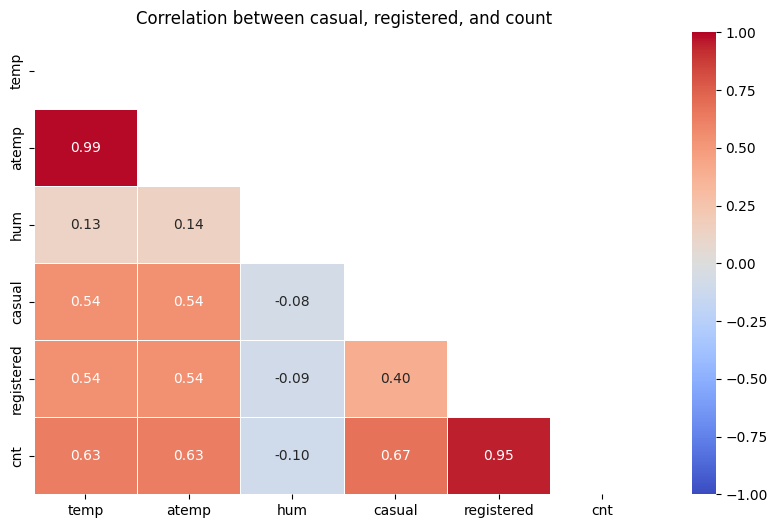

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
correlation = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1, linewidths=.5, ax=ax)
plt.title('Correlation between casual, registered, and count')
plt.show()




Berdasarkan analisis yang telah dilakukan, beberapa temuan korelasi antar variabel dapat diringkas sebagai berikut:

- Variabel 'atemp' (temperatur yang dirasakan) dan 'temp' (temperatur aktual) menunjukkan korelasi yang sangat kuat, dengan koefisien korelasi sebesar 0.99, menunjukkan bahwa kedua variabel tersebut hampir sempurna bergerak bersama.
- Variabel 'hum' (kelembapan) memiliki korelasi yang lemah dengan 'temp' dan 'atemp', dengan koefisien korelasi masing-masing sebesar 0.13 dan 0.14, menunjukkan pengaruh minimal kelembapan terhadap suhu.
- Pengguna sepeda non-terdaftar ('casual') menunjukkan korelasi yang cukup kuat dengan 'temp' dan 'atemp' (0.54), tetapi memiliki korelasi negatif yang sangat lemah dengan 'hum' (-0.08), menunjukkan bahwa kelembapan berpengaruh sedikit terhadap jumlah pengguna casual.
- Pengguna sepeda terdaftar ('registered') mengikuti pola yang sama dengan pengguna casual dalam hal korelasi dengan suhu dan kelembapan dan memiliki korelasi moderat dengan pengguna casual (0.40), menunjukkan bahwa kedua tipe pengguna cenderung berperilaku serupa dalam kondisi iklim yang sama.
- Total jumlah pengguna sepeda ('count') menunjukkan korelasi yang kuat dengan 'temp', 'atemp', 'casual', dan 'registered' (0.63, 0.63, 0.67, dan 0.95), dan memiliki korelasi negatif yang lemah dengan 'hum' (-0.10), menegaskan bahwa suhu yang lebih tinggi cenderung meningkatkan jumlah pengguna sepeda secara keseluruhan, sementara kelembapan yang lebih tinggi sedikit mengurangi jumlah tersebut.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimanakah tren penggunaan sepeda dalam setahun, tahun berapakah yang lebih unggul?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\268237602.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({


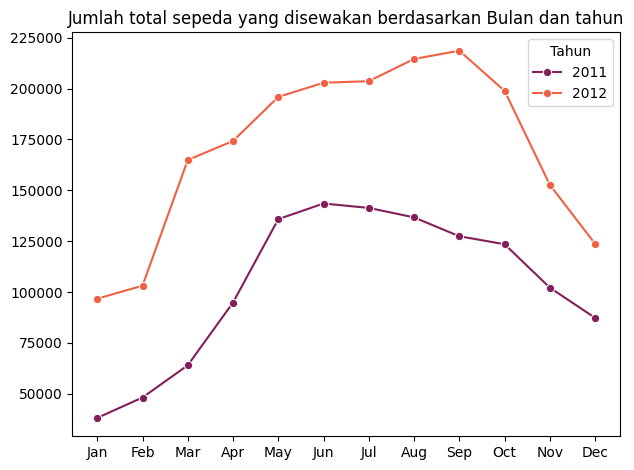

In [20]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Berdasarkan visualisasi lineplot yang disajikan, analisis data menunjukkan perbedaan dalam tren penyewaan sepeda antara tahun 2011 dan 2012. Pada tahun 2012, terlihat dominasi yang jelas dalam penyewaan sepeda dari bulan Januari hingga Desember, dengan bulan September mencatat puncak tertinggi dalam penyewaan. Bulan dengan aktivitas penyewaan terendah pada tahun 2012 adalah Januari. Sebaliknya, pada tahun 2011, puncak penyewaan sepeda tercatat pada bulan Juni, dengan Januari juga sebagai bulan dengan tingkat penyewaan paling rendah. Analisis ini menggambarkan fluktuasi musiman dan tahunan dalam pola penyewaan sepeda.

### Pertanyaan 2: Bagaimana Pengaruh cuaca terhadap jumlah penyewa sepeda?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\2772179660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='weathersit', y='cnt', palette='rocket')


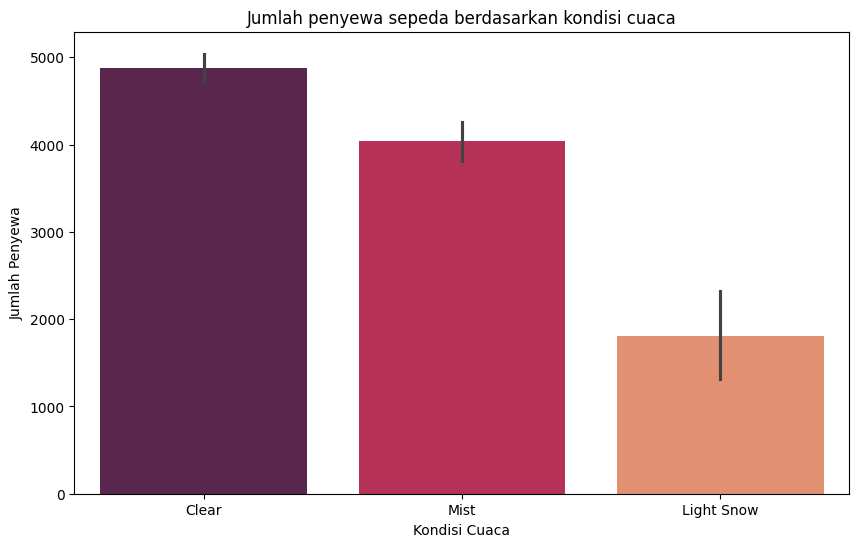

In [21]:
plt.figure(figsize=(10, 6 ))
sns.barplot(data=day_df, x='weathersit', y='cnt', palette='rocket')
plt.title('Jumlah penyewa sepeda berdasarkan kondisi cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa')
plt.show()



Analisis data yang dilakukan menggunakan barplot mengungkapkan adanya korelasi signifikan antara kondisi cuaca dan tingkat penyewaan sepeda. Kondisi cuaca yang cerah atau setengah mendung terbukti paling populer di antara penyewa sepeda, diikuti oleh kondisi berkabut atau mendung. Sementara itu, kondisi cuaca dengan sedikit salju atau hujan menunjukkan tingkat penyewaan yang paling rendah. Temuan ini menegaskan preferensi umum terhadap aktivitas luar ruangan dalam cuaca yang lebih cerah, sementara kondisi cuaca yang kurang ideal cenderung mengurangi frekuensi penyewaan sepeda.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda berbeda antara holidays, working days, weekdays, dan bagaimana ini mempengaruhi kebutuhan infrastruktur sepeda?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\2816516866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\2816516866.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\2816516866.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


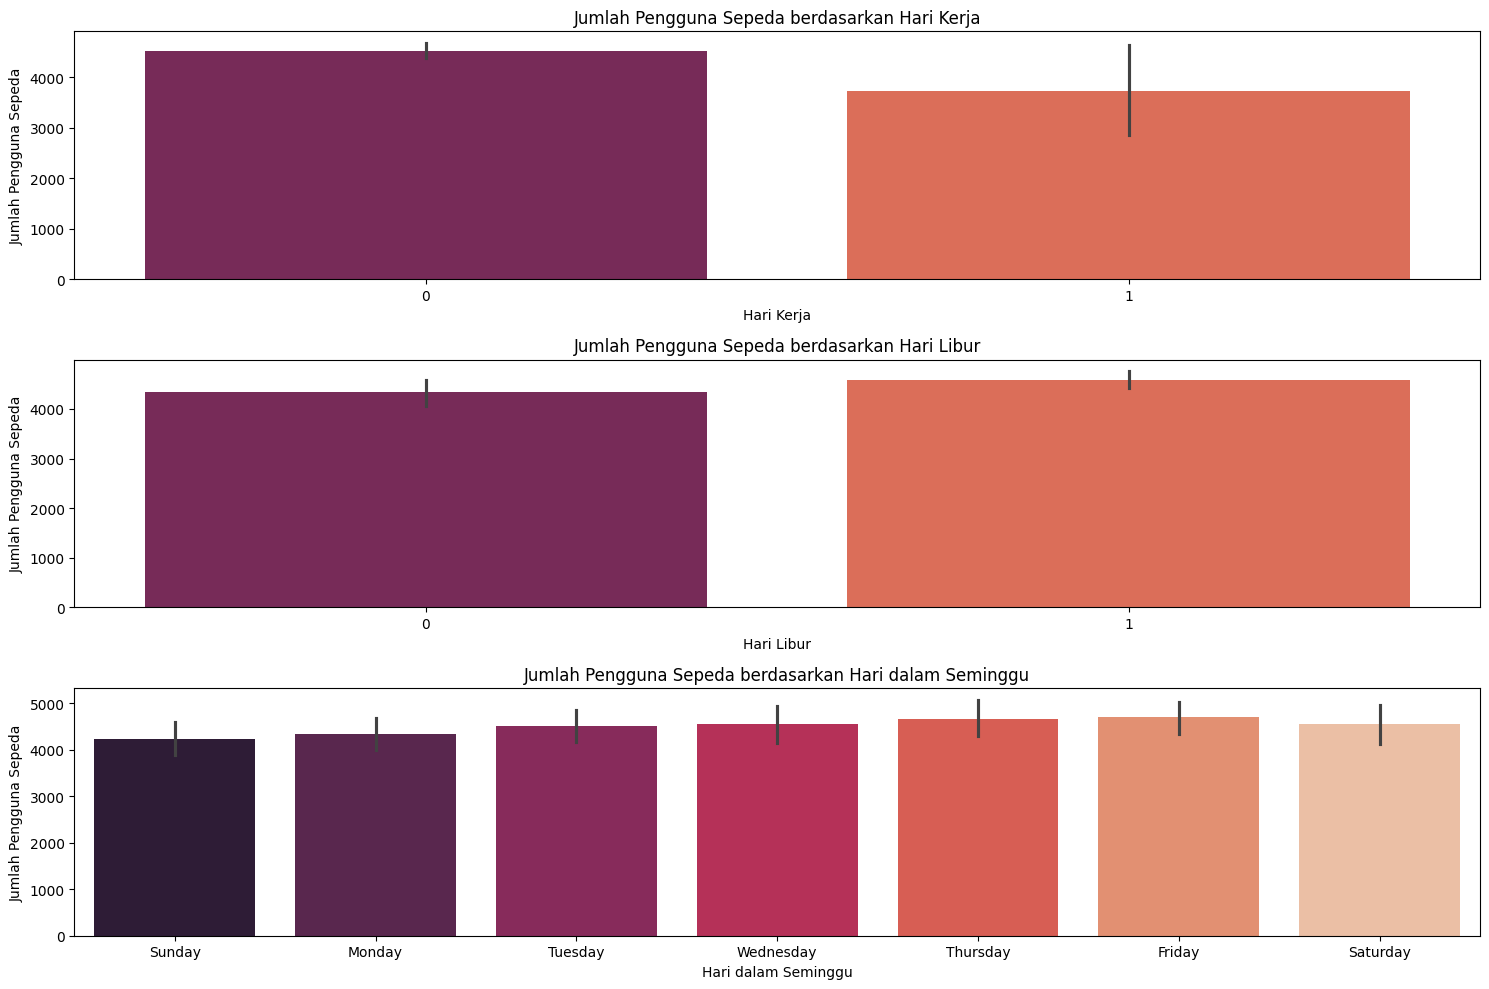

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

#holiday
sns.barplot(
  x='holiday',
  y='cnt',
  data=day_df,
  ax=axes[0],
  palette = 'rocket')
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

#workingday
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    ax=axes[1],
    palette='rocket')
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

#weekday
sns.barplot(
  x='weekday',
  y='cnt',
  data=day_df,
  ax=axes[2],
  palette='rocket')
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan analisis barplot yang telah dilakukan, dapat disimpulkan beberapa pola utama dalam perilaku penyewaan sepeda. Pertama, penyewaan sepeda lebih tinggi selama hari kerja (Senin hingga Jumat) dibandingkan dengan akhir pekan (Sabtu dan Minggu), dengan kode 0 yang menandakan akhir pekan dan 1 yang menandakan hari kerja. Kedua, penyewaan sepeda juga secara signifikan lebih tinggi pada hari biasa yang bukan merupakan hari libur nasional dibandingkan pada hari libur nasional.

Lebih lanjut, analisis menunjukkan bahwa Jumat adalah hari dengan jumlah penyewa sepeda tertinggi, sedangkan Minggu adalah hari dengan jumlah penyewa sepeda terendah. Temuan ini mengindikasikan bahwa ada preferensi yang kuat untuk menggunakan sepeda selama hari kerja, khususnya menjelang akhir pekan, dan menurun selama akhir pekan serta hari libur nasional.

### Pertanyaan 4: Bagaimana pengaruh musim terhadap jumlah penyewa sepeda berdasarkan pelanggan casual dan registered?



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22692\3570916722.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


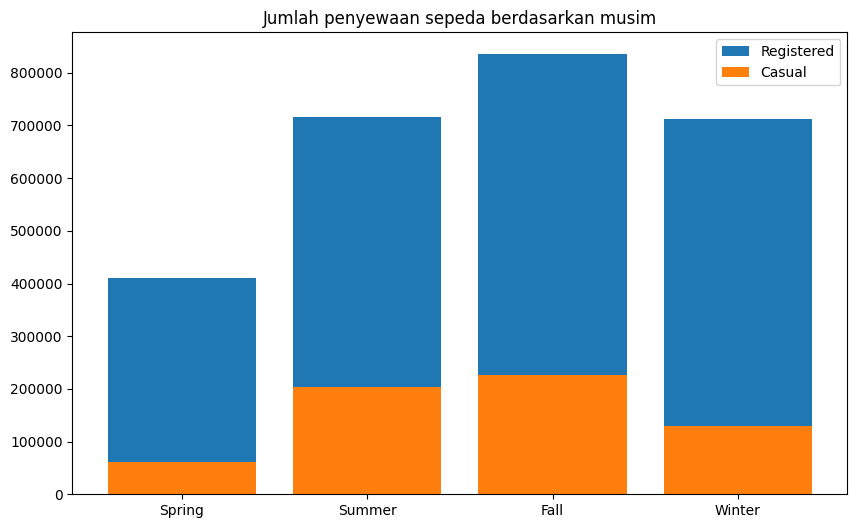

In [27]:
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Analisis yang dilakukan dengan menggunakan barplot menunjukkan preferensi musiman pengguna sepeda, baik untuk pengguna kasual maupun terdaftar. Musim gugur (Fall) tercatat sebagai musim yang paling disukai oleh para pengguna sepeda, diikuti oleh musim panas (Summer), musim dingin (Winter), dan musim semi (Spring) yang memiliki tingkat penyewaan sepeda paling rendah. Temuan ini mengindikasikan bahwa kondisi cuaca pada musim gugur, yang biasanya menawarkan temperatur yang lebih sejuk dan kondisi yang stabil, sangat cocok untuk bersepeda, sementara musim semi, yang sering kali lebih dingin dan lebih berangin, kurang disukai untuk aktivitas yang sama.

### Pertanyaan 5: Bagaimana pengaruh suhu udara dan kelembaban udara terhadap jumlah penyewa sepeda?

Text(0.5, 1.0, 'Humidity vs Count')

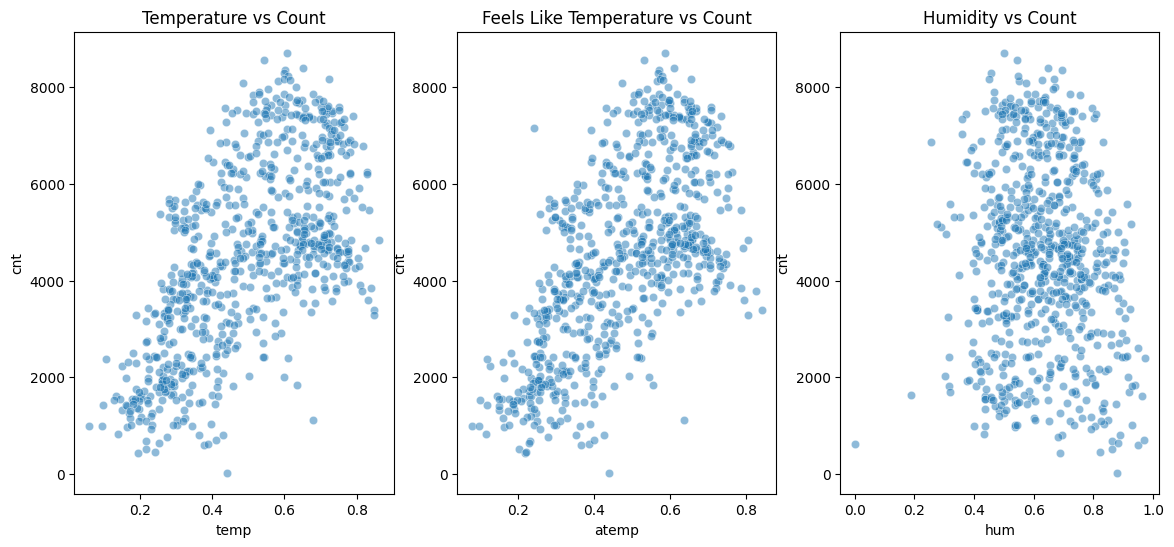

In [24]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='cnt',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='cnt',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='cnt',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

Analisis yang dilakukan menggunakan scatter plot mengungkapkan beberapa hubungan korelatif antara kondisi iklim dan penggunaan sepeda. Terdapat korelasi positif yang signifikan antara temperatur (baik 'temp' maupun 'atemp') dan jumlah penyewa sepeda ('count'), yang menunjukkan bahwa peningkatan temperatur cenderung beriringan dengan peningkatan jumlah penyewa sepeda. Sementara itu, hubungan antara kelembapan ('hum') dan jumlah penyewa sepeda menunjukkan korelasi negatif yang lebih lemah. Meskipun ada indikasi bahwa kelembapan bisa sedikit mengurangi jumlah penyewa sepeda, efek ini tidak terlalu signifikan, mengingat plotnya yang condong ke kiri tetapi tidak menunjukkan kemiringan yang tajam. Kesimpulan dari analisis ini menegaskan bahwa temperatur yang lebih tinggi mendukung penggunaan sepeda lebih banyak, sementara pengaruh kelembapan terhadap penyewaan sepeda terbatas.

## Conclusion

- Conclution pertanyaan 1: Dari visualisasi yang dihadirkan, terdapat perbedaan mencolok dalam tren penyewaan sepeda antara tahun 2011 dan 2012, terutama dalam hal waktu puncak dan terendah dari penyewaan sepeda. Pada tahun 2011, puncak penyewaan terjadi pada bulan Juni, sedangkan titik terendahnya tercatat pada bulan Januari. Sebaliknya, untuk tahun 2012, bulan dengan penyewaan tertinggi adalah September, dengan bulan Januari kembali menjadi bulan dengan penyewaan terendah. Lebih lanjut, analisis tersebut menunjukkan bahwa total jumlah sepeda yang disewakan selama tahun 2012 secara konsisten lebih tinggi dibandingkan dengan tahun 2011. Hal ini dapat menunjukkan peningkatan popularitas atau perluasan layanan penyewaan sepeda dari satu tahun ke tahun berikutnya.
- Conclution pertanyaan 2: Kesimpulannya, analisis ini menegaskan bahwa kondisi cuaca memainkan peran penting dalam menentukan tingkat aktivitas penyewaan sepeda, dengan cuaca cerah secara signifikan mendukung peningkatan penyewaan, sedangkan cuaca yang buruk menghambatnya.
- Conclution pertanyaan 3: Kesimpulannya, data menunjukkan bahwa faktor-faktor seperti jenis hari (kerja atau libur) dan hari tertentu dalam seminggu mempengaruhi perilaku penyewaan sepeda, dengan hari kerja biasa dan khususnya Hari Jumat sebagai pilihan paling populer untuk penyewaan sepeda.
- Conclution pertanyaan 4: Analisis data mengenai pengaruh musiman terhadap penyewaan sepeda memberikan wawasan yang tidak terduga, terutama dengan posisi musim dingin yang tidak terakhir dalam peringkat penyewaan. Sebaliknya, musim semi, yang sering diasumsikan lebih menguntungkan untuk aktivitas luar seperti bersepeda, justru tercatat memiliki jumlah penyewaan terendah. Faktor-faktor seperti kondisi cuaca yang tidak stabil, temperatur yang masih relatif dingin, dan faktor lain seperti dinamika hari kerja versus hari libur mungkin berkontribusi pada hasil ini. Di sisi lain, musim gugur menonjol sebagai musim dengan jumlah penyewaan sepeda paling tinggi, mencapai lebih dari 800,000 penyewaan. Kondisi cuaca yang ideal di musim gugur, seperti temperatur yang sejuk namun nyaman dan minimnya hujan, mungkin menjadikan musim ini sangat cocok untuk bersepeda, berbeda dengan ekspektasi untuk musim semi. Kesimpulan dari analisis ini adalah bahwa musim gugur menjadi waktu yang paling favorit untuk penyewaan sepeda, diikuti oleh musim-musim lain dengan tingkat variatif. Musim semi, meskipun sering dianggap ideal, ternyata memiliki performa yang lebih rendah, menunjukkan pentingnya mempertimbangkan faktor-faktor lokal dan kondisi spesifik saat merencanakan dan mengelola layanan penyewaan sepeda.
- Conclution pertanyaan 5: Berdasarkan tiga visualisasi yang dianalisis, teridentifikasi bahwa ada hubungan yang positif antara temperatur (baik 'temp' maupun 'atemp') dan jumlah penyewaan sepeda ('count'). Ini menunjukkan bahwa peningkatan temperatur berbanding lurus dengan peningkatan penggunaan sepeda, menegaskan bahwa kondisi yang lebih hangat mendorong lebih banyak aktivitas bersepeda. Sebaliknya, kelembapan ('hum') menunjukkan korelasi negatif dengan jumlah penyewaan sepeda, meskipun korelasi tersebut sangat minim dan mungkin tidak terlalu signifikan. Namun, kecenderungan tersebut masih relevan, menunjukkan bahwa peningkatan kelembapan cenderung sedikit menurunkan jumlah penyewaan sepeda.Kesimpulan dari analisis ini adalah bahwa faktor iklim, khususnya temperatur, memiliki pengaruh penting terhadap perilaku penyewaan sepeda. Kondisi yang lebih hangat dan menyenangkan secara signifikan mendukung penggunaan sepeda, sedangkan kondisi lembap, meskipun efeknya minimal, bisa sedikit menghambat aktivitas tersebut. Ini menyoroti pentingnya mempertimbangkan faktor iklim dalam perencanaan dan promosi layanan penyewaan sepeda, khususnya dalam menyesuaikan kapasitas dan promosi sesuai dengan perubahan musiman dan kondisi cuaca.

